Importar librerías necesarias

In [1]:
import Modelos
import importlib
importlib.reload(Modelos)

<module 'Modelos' from 'c:\\Users\\juanc\\OneDrive\\Documentos\\Universidad\\tesis\\OptimizationTesis\\optimization_model\\Modelos.py'>

### Variables de ajuste

In [2]:
cantidadNodos = [2, 4, 6]
confiabilidadObjetivoSerie = [0.03, 0.06, 0.09]
confiabilidadObjetivoParalelo = [0.85,0.95,0.99]

## Caso SERIE

In [3]:
costosSerie = [] # Lista para almacenar los costos asociados
tipoNodosSerie = []

for nodos in cantidadNodos:
    for confiabilidad in confiabilidadObjetivoSerie:
        model_base = Modelos.base_model(nodos) # Crear modelo base
        costo, variables = Modelos.serie_model(model_base, nodos, confiabilidad)# Ejecutar modelo en serie

        if variables is None:  # Cuando no hay solución
            print(f"No se encontró solución={nodos} y confiabilidad={confiabilidad}")
            costosSerie.append((nodos, confiabilidad, None))
            tipoNodosSerie.append({'Low': 0, 'Medium': 0, 'High': 0})
            continue

        costosSerie.append((nodos, confiabilidad, costo))# Almacenar resultados de costos

        # Procesar variables de decisión para obtener tipos de nodo
        tipoNodo = {'Low': 0, 'Medium': 0, 'High': 0}
        for var, value in variables.items():
            if var.startswith("x"):
                _, tipo = map(int, var.split('[')[1].split(']')[0].split(','))
                if tipo == 1:
                    tipoNodo['Low'] += int(value)
                elif tipo == 2:
                    tipoNodo['Medium'] += int(value)
                elif tipo == 3:
                    tipoNodo['High'] += int(value)
        tipoNodosSerie.append(tipoNodo)

Restricted license - for non-production use only - expires 2026-11-23


### Gráfica Costo vs Cantidad de Nodos para Diferentes Confiabilidades

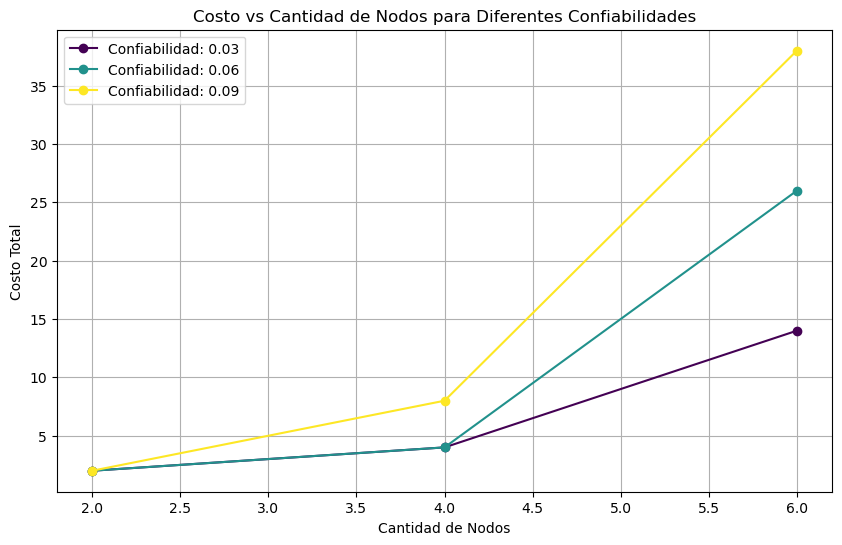

In [4]:
Modelos.grafico_costo_vs_cantidad_nodos_general(costosSerie)

### Gráfica de Distribución por Rango de Confiabilidad

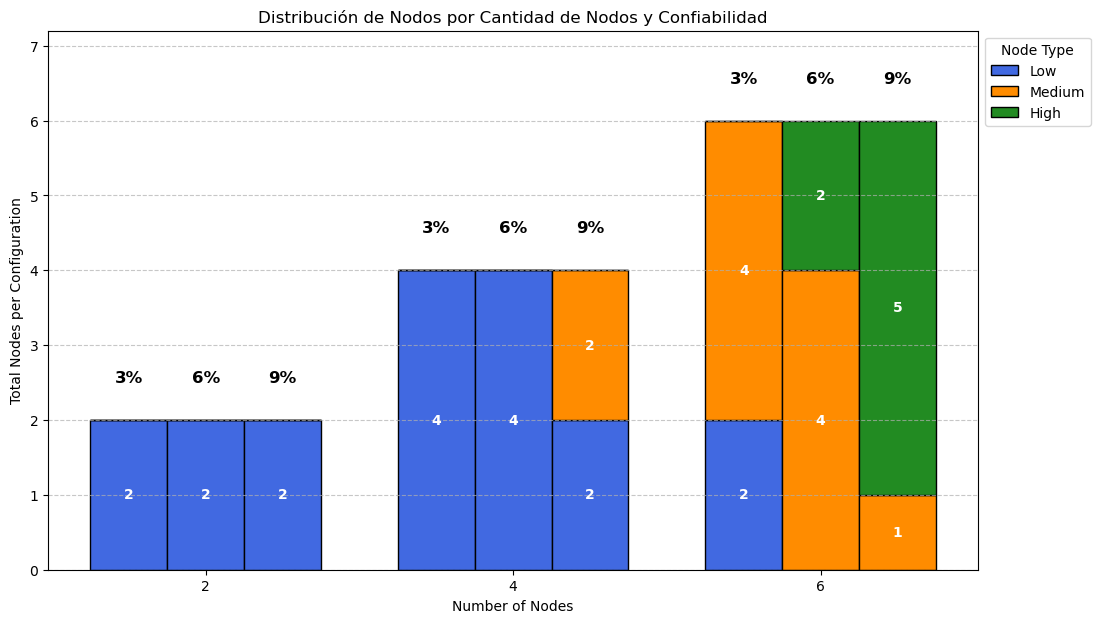

In [5]:
Modelos.grafico_barras_confiabilidad(costosSerie, tipoNodosSerie)

### Resultados en tabla

In [6]:
Modelos.mostrarResultadosTabla2(costosSerie, tipoNodosSerie)


Resultados en formato tabular:

╔═════════╦═════════════════╦═════════╦═══════╦══════════╦════════╗
║   Nodos ║   Confiabilidad ║   Costo ║   Low ║   Medium ║   High ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       2 ║            0.03 ║       2 ║     2 ║        0 ║      0 ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       2 ║            0.06 ║       2 ║     2 ║        0 ║      0 ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       2 ║            0.09 ║       2 ║     2 ║        0 ║      0 ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       4 ║            0.03 ║       4 ║     4 ║        0 ║      0 ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       4 ║            0.06 ║       4 ║     4 ║        0 ║      0 ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       4 ║            0.09 ║       8 ║     2 ║        2 ║      0 ║
╠═════════╬════

## Caso Paralelo

In [7]:
for nodos in cantidadNodos:
    for confiabilidad in confiabilidadObjetivoParalelo:
        model_base = Modelos.base_model(nodos) # Crear modelo base
        costoParalelo, variablesParalelo = Modelos.paralelo_model(model_base, nodos, confiabilidad) # Ejecutar modelo en paralelo

        Modelos.mostrarResultadosTabla(nodos, confiabilidad, 1, costoParalelo, variablesParalelo)

Cantidad de Nodos:  2
Confiabilidad Objetivo:  0.85
Caso:  Paralelo
Resultado de la Optimización:
Costo Total:  8.0
Nodos activos: 

   Low Cost  Mid Cost  High Cost
1         1         0          0
2         0         0          1
Cantidad de Nodos:  2
Confiabilidad Objetivo:  0.95
Caso:  Paralelo
No se encontró solución
Cantidad de Nodos:  2
Confiabilidad Objetivo:  0.99
Caso:  Paralelo
No se encontró solución
Cantidad de Nodos:  4
Confiabilidad Objetivo:  0.85
Caso:  Paralelo
Resultado de la Optimización:
Costo Total:  4.0
Nodos activos: 

   Low Cost  Mid Cost  High Cost
1         1         0          0
2         1         0          0
3         1         0          0
4         1         0          0
Cantidad de Nodos:  4
Confiabilidad Objetivo:  0.95
Caso:  Paralelo
Resultado de la Optimización:
Costo Total:  6.0
Nodos activos: 

   Low Cost  Mid Cost  High Cost
1         1         0          0
2         1         0          0
3         1         0          0
4         0         1